In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Leads.csv")

In [2]:
df.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [3]:
# Lowering strings
df = df.applymap(lambda s:s.lower() if type(s) == str else s)
#df = df.replace('select',np.nan)

df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## EDA

<Axes: xlabel='City', ylabel='count'>

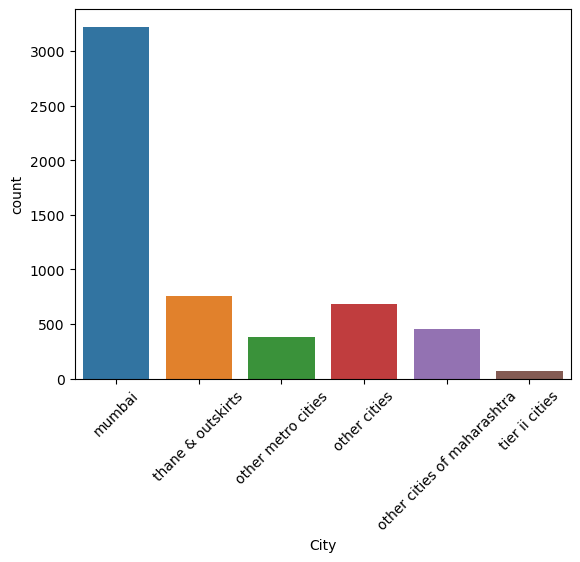

In [26]:
import seaborn as sns

df = df.replace("select", np.nan)
plt.xticks(rotation=45)

sns.countplot(x ='City', data = df)


<Axes: xlabel='Lead Source', ylabel='count'>

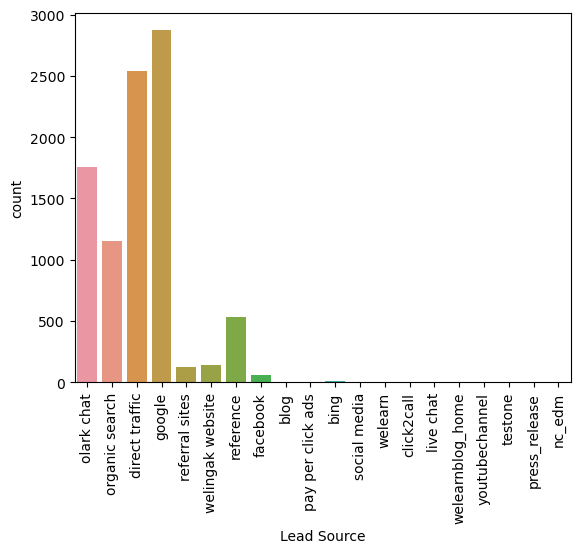

In [32]:
import seaborn as sns

df = df.replace("select", np.nan)
plt.xticks(rotation=90)

sns.countplot(x ='Lead Source', data = df)


<Axes: xlabel='Lead Origin', ylabel='count'>

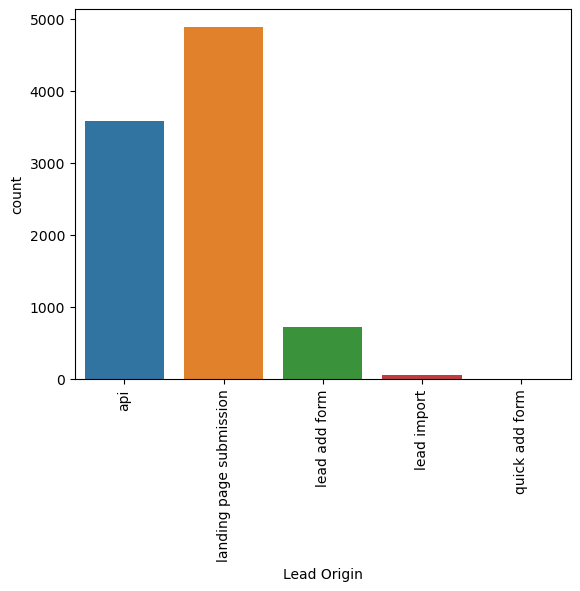

In [31]:
import seaborn as sns

df = df.replace("select", np.nan)
plt.xticks(rotation=90)

sns.countplot(x ='Lead Origin', data = df)


<Axes: xlabel='Specialization', ylabel='count'>

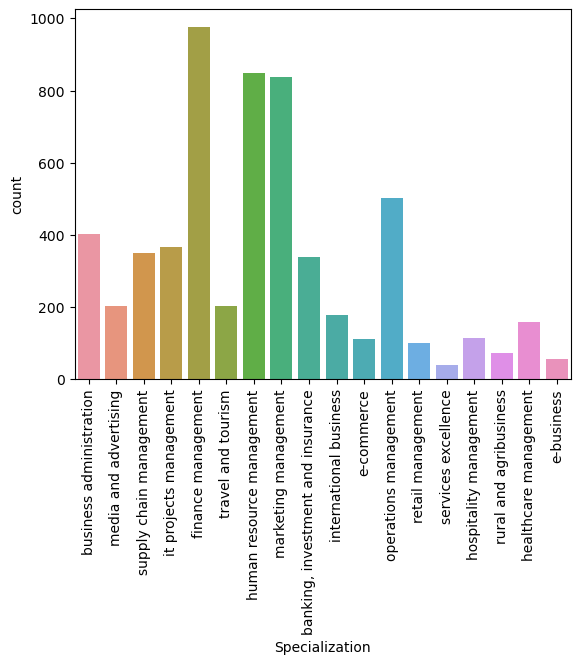

In [30]:
import seaborn as sns

df = df.replace("select", np.nan)
plt.xticks(rotation=90)

sns.countplot(x ='Specialization', data = df)


<Axes: xlabel='Tags', ylabel='count'>

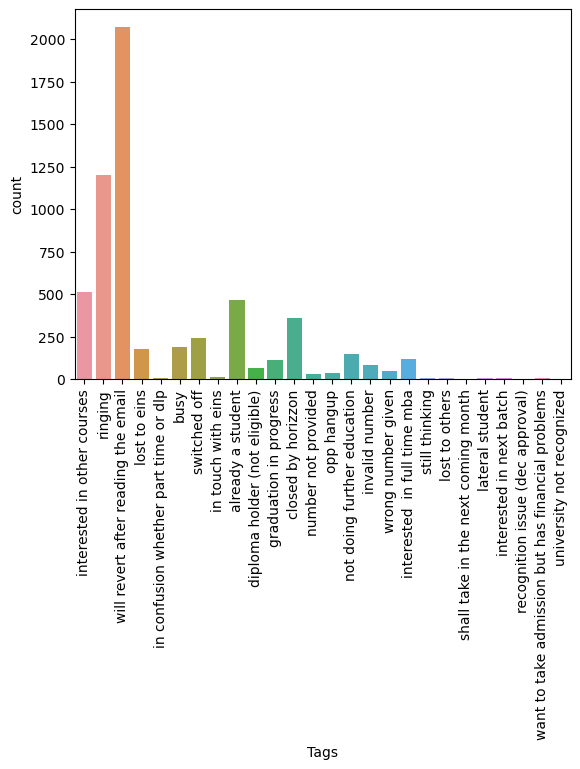

In [37]:
import seaborn as sns

df = df.replace("select", np.nan)
plt.xticks(rotation=90)

sns.countplot(x ='Tags', data = df)


In [4]:
df1 = df.drop([
               'I agree to pay the amount through cheque',
               'Get updates on DM Content',
               'Receive More Updates About Our Courses',
               'Update me on Supply Chain Content',
               'Magazine']
    ,axis=1)


In [5]:
# Get null percentages
df1.isnull().sum()/len(df1.index)


Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Newspaper Arti

In [6]:
# Dropping high percentage of nulls
df2 = df1.drop([
    'Tags',
    'Lead Profile',
    'Lead Quality',
    'City',
    'Lead Number',
    'Asymmetrique Profile Index',
    'Asymmetrique Activity Index',
    'Asymmetrique Activity Score',
    'Asymmetrique Profile Score',
    'How did you hear about X Education',
    ],axis=1)
df2.head()


,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [7]:
df2['Specialization'] = df2['Specialization'].fillna('NA') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('NA')
df2['Country'] = df2['Country'].fillna('NA')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('NA')
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [8]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [9]:
df_final = df3.drop('Prospect ID',1)
df_final.shape


C:\Users\Dell\AppData\Local\Temp\ipykernel_25664\2896160755.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_final = df3.drop('Prospect ID',1)


(9074, 21)

## EDA

Univariate Analysis

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

## Dummy Variables

In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [12]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,NA,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,saudi arabia,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [14]:
df_final_dum = df_final_dum.drop([
   # 'What is your current occupation_not provided',
    'Lead Origin', 
    'Lead Source', 
    'Do Not Email', 
    'Do Not Call',
    'Last Activity', 
    'Country', 
    'Specialization', 
   # 'Specialization_not provided',
    'What is your current occupation',
    'What matters most to you in choosing a course', 
    'Search',
    'Newspaper Article', 
    'X Education Forums', 
    'Newspaper',
    'Digital Advertisement', 
    'Through Recommendations',
    'A free copy of Mastering The Interview', 
    'Last Notable Activity'
], 1)
df_final_dum


C:\Users\Dell\AppData\Local\Temp\ipykernel_25664\1578179486.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_final_dum = df_final_dum.drop([


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X = df_final_dum.drop(['Converted'], 1)
X.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_25664\3242320528.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_final_dum.drop(['Converted'], 1)


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
y = df_final_dum['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Correlation between variables

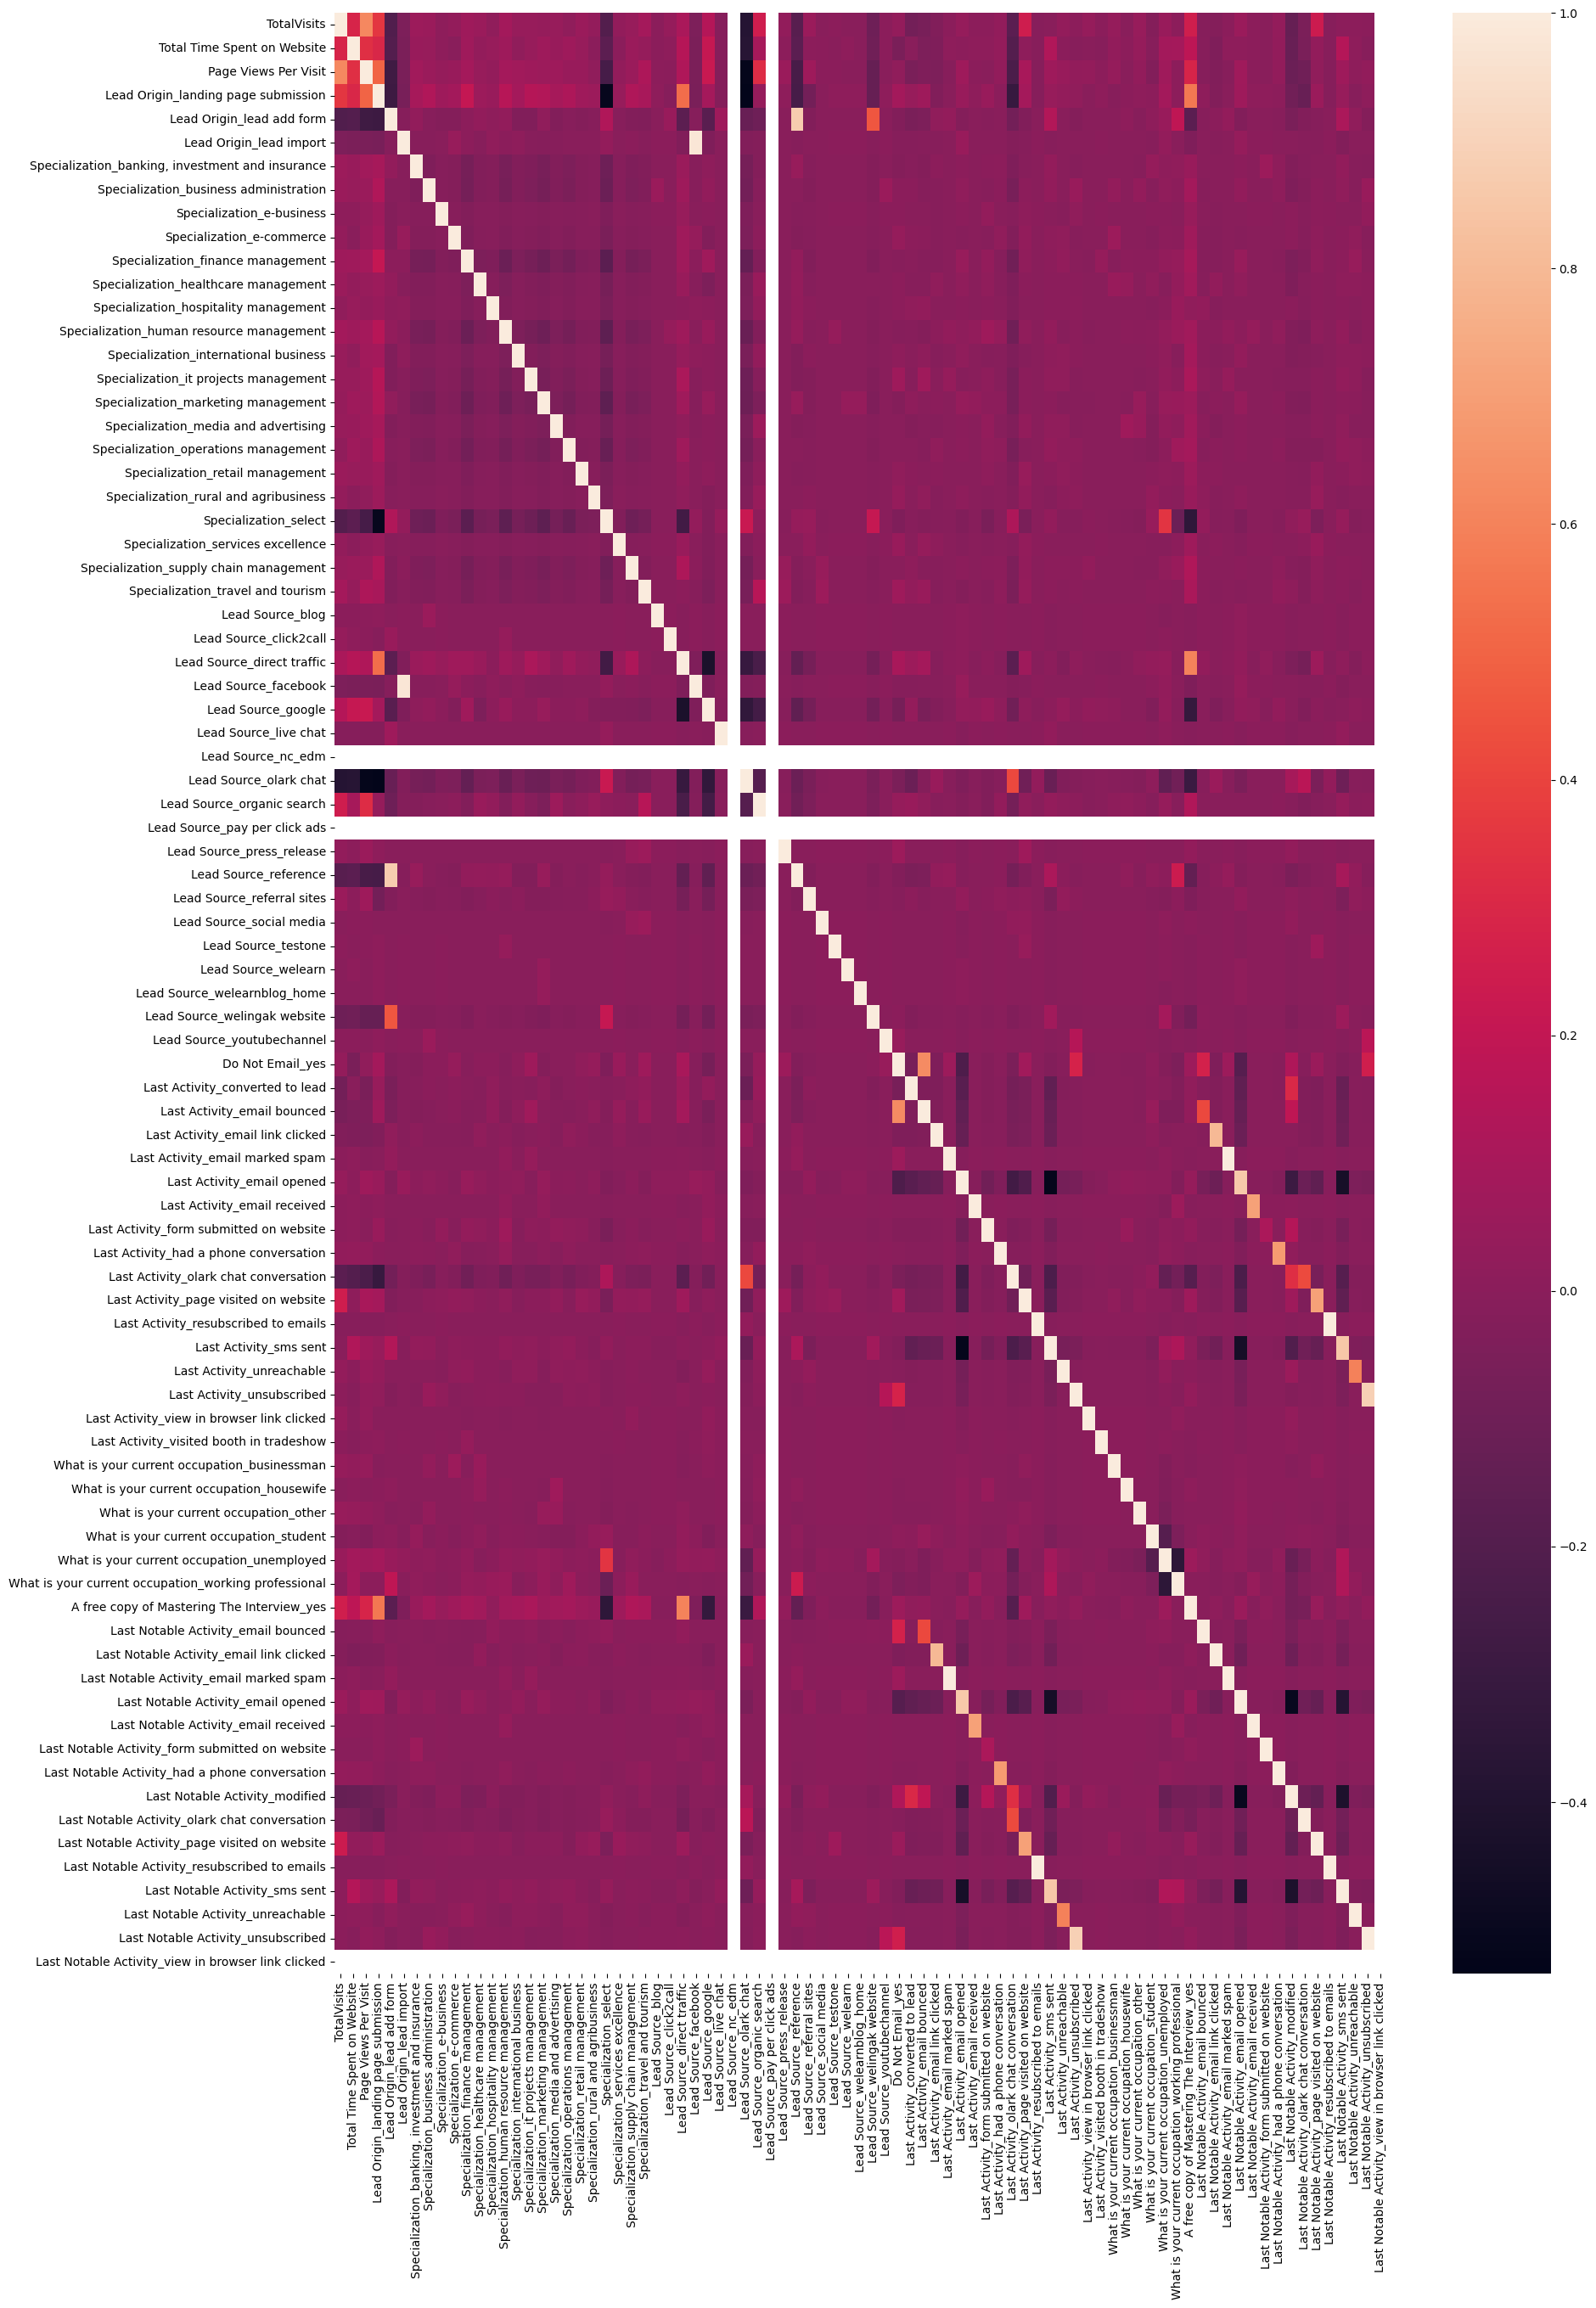

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,30))
#sns.color_palette("viridis")

sns.heatmap(X_train.corr())
plt.show()


## Model Building

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)


list(zip(X_train.columns, rfe.support_, rfe.ranking_))


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 15),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 48),
 ('Specialization_banking, investment and insurance', False, 14),
 ('Specialization_business administration', False, 26),
 ('Specialization_e-business', False, 27),
 ('Specialization_e-commerce', False, 19),
 ('Specialization_finance management', False, 23),
 ('Specialization_healthcare management', False, 20),
 ('Specialization_hospitality management', False, 66),
 ('Specialization_human resource management', False, 24),
 ('Specialization_international business', False, 29),
 ('Specialization_it projects management', False, 22),
 ('Specialization_marketing management', False, 17),
 ('Specialization_media and advertising', False, 30),
 ('Specialization_operations management', False, 21),
 ('Specialization_retail management', False, 43),
 ('Speciali

In [21]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

X_train = X_train[col]

In [22]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

X_train_sm = sm.add_constant(X_train)

#model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

result = model.fit()


NameError: name 'model' is not defined

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


In [ ]:
X_train.drop([
    'Last Notable Activity_had a phone conversation', 
    'What is your current occupation_housewife', 
    'What is your current occupation_other'], 
axis = 1, inplace = True)

# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

result = model.fit()


In [ ]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


## Prediction

In [ ]:
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]


In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()


In [ ]:
# Setting threshold to 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


## Model Evaluation

In [ ]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted)


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

report = classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted, output_dict = True)
print(report)

In [ ]:
# Sensitivity
print(report['1']['recall'])

In [ ]:
# Specificity
print(report['0']['recall'])

## Optimise Cut off (ROC Curve)


In [ ]:
def roc( fpr, tpr, thresholds, auc_score ):
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob )

roc(fpr, tpr, thresholds, auc_score)


In [ ]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()


In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

report = classification_report(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted, output_dict = True)
print(report)

In [ ]:
# Sensitivity
print(report['1']['recall'])

In [ ]:
# Specificity
print(report['0']['recall'])

## Prediction on Test set


In [ ]:
y_test_pred = res.predict(X_test_sm)

y_pred_df = pd.DataFrame(y_test_pred)

y_test_df = pd.DataFrame(y_test)

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()


In [ ]:
# Making prediction using cut off 0.35
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final


In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.Final_Predicted)


In [ ]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Final_Predicted )
confusion2


In [ ]:
report = classification_report(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted, output_dict = True)
print(report)

In [ ]:
# Sensitivity
print(report['1']['recall'])


## Precision-Recall

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion


In [ ]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])


In [ ]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])


## Precision and recall tradeoff


In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1])
plt.plot(thresholds, r[:-1])
plt.show()


In [ ]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

## Prediction on Test set


In [ ]:
y_test_pred = res.predict(X_test_sm)

y_pred_df = pd.DataFrame(y_test_pred)

y_test_df = pd.DataFrame(y_test)

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()


In [ ]:
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)


In [ ]:
# Accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.Final_Predicted)


In [ ]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Final_Predicted )
confusion2


In [ ]:
report = classification_report(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted, output_dict = True)
print(report)

In [ ]:
# Precision
print(report["1"]["precision"])

In [ ]:
#Recall
print(report["1"]["recall"])

## Most important parameters

In [ ]:
result.params.sort_values(ascending = False)

## Conclusion


The 10 variables that matter most:

1. TotalVisits -                                            5.727639
2. Total Time Spent on Website -                            4.614182
3. Lead Origin_lead add form -                              3.756959
4. What is your current occupation_working professional -   3.655520
5. Lead Source_welingak website -                           2.582793
6. Last Notable Activity_unreachable -                       1.806575
7. Lead Source_olark chat -                                 1.578001
8. Last Activity_sms sent -                                 1.261604
9. What is your current occupation_student -                1.221821
10. What is your current occupation_unemployed -             1.139414